In [90]:
import numpy as np
import pandas as pd

abalone_df = pd.read_table("abalone.data", sep=",",header=None)
abalone_df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [91]:
abalone_df.columns=["Sex","Length","Diameter","Height","Whole_wt","Shucked_wt","Viscera_wt","Shell_wt","Rings"]
#to predict age add 1.5
abalone_df["Age"] = abalone_df["Rings"] + 1.5
abalone_df.head()

,Sex,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


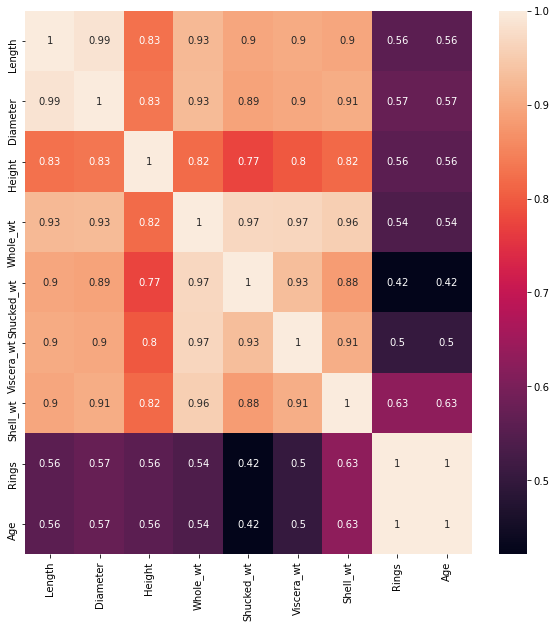

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = abalone_df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

plt.show()

In [93]:
abalone_df.corr()['Rings'].sort_values()

Shucked_wt    0.420884
Viscera_wt    0.503819
Whole_wt      0.540390
Length        0.556720
Height        0.557467
Diameter      0.574660
Shell_wt      0.627574
Rings         1.000000
Age           1.000000
Name: Rings, dtype: float64

In [94]:
#Encode Sex column using one hot encoding
dum_df = pd.get_dummies(abalone_df['Sex'])
abalone_df = abalone_df.join(dum_df)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings,Age,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,1,0


In [95]:
#drop Sex column after one hot encoding
abalone_df = abalone_df.drop('Sex',axis=1)

In [96]:
#abalone_df = abalone_df.drop(['Sex','Shucked_wt'],axis=1)
abalone_df.head()

,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings,Age,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,1,0


Look at the boxplots to see where the outliers are so we can remove them. 

[Text(0.5, 0, 'Height')]

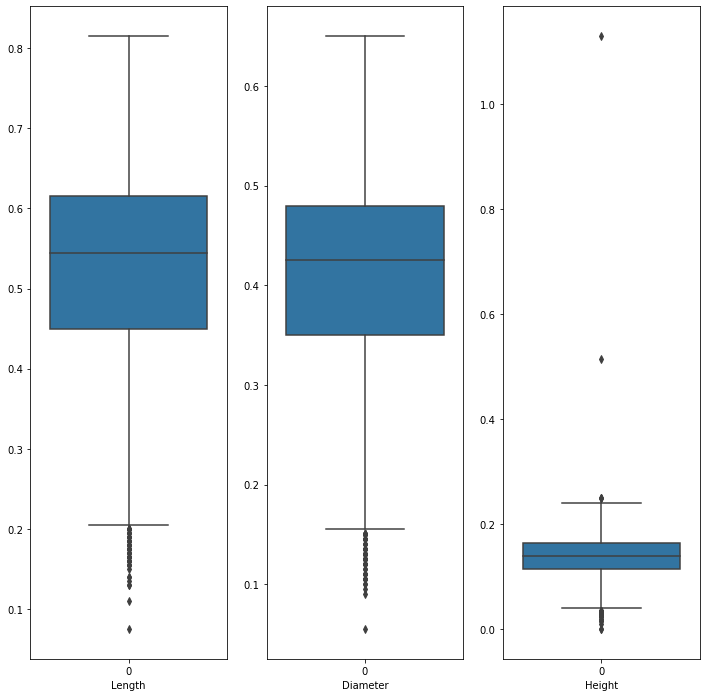

In [97]:
fig, axes = plt.subplots(1,3, figsize = (12,12), sharey = False)
sns.boxplot(ax = axes[0], data = abalone_df["Length"])
axes[0].set(xlabel = 'Length')
sns.boxplot(ax = axes[1], data = abalone_df["Diameter"])
axes[1].set(xlabel = 'Diameter')
sns.boxplot(ax = axes[2], data = abalone_df["Height"])
axes[2].set(xlabel = 'Height')

[Text(0.5, 0, 'Shell_wt')]

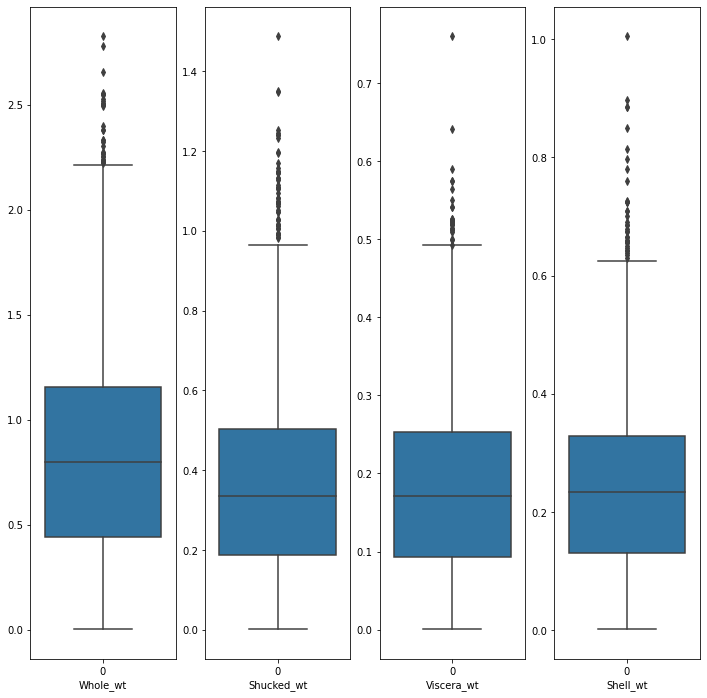

In [98]:
fig, axes = plt.subplots(1,4, figsize = (12,12), sharey = False)
sns.boxplot(ax = axes[0], data = abalone_df["Whole_wt"])
axes[0].set(xlabel = 'Whole_wt')
sns.boxplot(ax = axes[1], data = abalone_df["Shucked_wt"])
axes[1].set(xlabel = 'Shucked_wt')
sns.boxplot(ax = axes[2], data = abalone_df["Viscera_wt"])
axes[2].set(xlabel = 'Viscera_wt')
sns.boxplot(ax = axes[3], data = abalone_df["Shell_wt"])
axes[3].set(xlabel = 'Shell_wt')

The statistics of the abalone_df before removing the outliers to see how it changes. 

In [99]:
abalone_df.describe()

,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings,Age,F,I,M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000,1.000000,1.000000,1.000000


Remove the outliers and see how the shape changes. 

In [100]:
#remove outliers
Q1 = abalone_df.quantile(0.25)
Q3 = abalone_df.quantile(0.75)
IQR = Q3 - Q1

abalone_df = abalone_df[~((abalone_df < (Q1 - 1.5 * IQR)) |(abalone_df > (Q3 + 1.5 * IQR))).any(axis=1)]
abalone_df.shape

(3781, 12)

See how the statistics change after removing the outliers. Most notable difference is in the Rings/Age column in terms of the max value. Also in the height column. 

In [101]:
abalone_df.describe()

,Length,Diameter,Height,Whole_wt,Shucked_wt,Viscera_wt,Shell_wt,Rings,Age,F,I,M
count,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000,3781.000000
mean,0.521041,0.404985,0.137325,0.792124,0.347486,0.173871,0.226079,9.430574,10.930574,0.306797,0.333510,0.359693
std,0.111517,0.092269,0.035305,0.444701,0.203506,0.101324,0.122824,2.330442,2.330442,0.461225,0.471529,0.479974
min,0.205000,0.155000,0.040000,0.042500,0.017000,0.000500,0.013000,4.000000,5.500000,0.000000,0.000000,0.000000
25%,0.450000,0.345000,0.110000,0.433000,0.181000,0.090500,0.125000,8.000000,9.500000,0.000000,0.000000,0.000000
50%,0.535000,0.420000,0.140000,0.766500,0.327000,0.164000,0.220000,9.000000,10.500000,0.000000,0.000000,0.000000
75%,0.610000,0.475000,0.165000,1.117500,0.492000,0.244000,0.314500,11.000000,12.500000,1.000000,1.000000,1.000000
max,0.760000,0.600000,0.240000,2.127500,0.960000,0.492000,0.625000,15.000000,16.500000,1.000000,1.000000,1.000000


2.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

#### Tried using Recursive Feature Selection but the model became worse when dropping other features - so I decided to keep all of the features. 

In [102]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

X = abalone_df.drop(['Age','Rings'],axis=1)
y = abalone_df['Age']

estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=4,step=1)
selector = selector.fit(X,y)

print(selector.support_)
print(selector.ranking_)

#Diameter, Height, and Shucked weight, and Shell Weight are the 4 most important features

[False  True  True False  True False  True False False False]
[7 1 1 2 1 3 1 6 4 5]


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.tree import DecisionTreeRegressor

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [133]:
# decision tree classifier
model = DecisionTreeRegressor(max_depth = 10,min_samples_leaf=0.1,random_state=1)

In [134]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [135]:
mse_model = MSE(y_test,y_pred)
rmse_model = mse_model**(1/2)
print("Root Mean Squared Error: ", rmse_model)
print("Mean Squared Error: ", mse_model)
# r2_val = r2_score(y_test,y_pred)
# print("R2 Score: ", r2_val)

Root Mean Squared Error:  1.8322591753063069
Mean Squared Error:  3.357173685494148
R2 Score:  0.41366788371992436


3.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it. 

In [136]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 11, n_estimators=200, min_samples_leaf = 1, random_state =7)

rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse_rf = MSE(y_test,y_pred)
rmse_rf = mse_rf **(1/2)

print("Root Mean Squared Error: ", rmse_rf)
print("Mean Squared Error: ", mse_rf)

Root Mean Squared Error:  1.6727908175207526
Mean Squared Error:  2.7982291191817477


4.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

In [137]:
import xgboost as xg
xgb = xg.XGBRegressor(n_estimators=500,max_depth=1,random_state=1)

xgb_model = xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

mse_xg = MSE(y_test, y_pred)
rmse_xg = mse_xg ** (1/2)

print("Root Mean Squared Error: ", rmse_xg)
print("Mean Squared Error: ", mse_xg)

Root Mean Squared Error:  1.6929628473933047
Mean Squared Error:  2.866123202654046


The model that did the best was the RandomForestRegressor but the xgboost model was also really close. This was done by changing the number of estimators, max depth, and random state. Looking at the Root Mean Squared Error, which is the goodness of a fit. Lower RMSE values indicate a better fit. 